In [18]:
import pandas as pd
from opytex import texenv
%matplotlib inline

# Informations sur le devoir

In [19]:
ds_name = "DS_15_09_25"
classe =  "309"

latex_info = {}
latex_info['titre'] =  "DS 1"
latex_info['classe'] = classe
latex_info['date'] = "25 septembre 2015"
latex_info

{'classe': '309', 'date': '25 septembre 2015', 'titre': 'DS 1'}

# Import et premiers traitements

In [20]:
notes = pd.ExcelFile("./../../../"+classe+".xlsx")
notes.sheet_names
notes = notes.parse(ds_name)

In [21]:
notes.index

Index([     'DS_15_09_25',     'numero sujet',     'Presentation',
             'Exercice 1',                  1,                  2,
             'Exercice 2',     '1 (Division)',   '2.a (Division)',
             '2.b (PGCD)',       'Exercice 3',    '1 (Vrai Faux)',
              '2 (Proba)',        '3 (Proba)',       'Exercice 4',
       '1 (Modélisation)',  '1 (Explication)'],
      dtype='object')

In [22]:
notes = notes.T

In [23]:
#notes = notes.drop('av_arrondi', axis=1)
notes = notes.drop('numero sujet', axis=1)

In [24]:
barem = notes[:1]
notes = notes[1:]
notes

DS_15_09_25  Presentation  Exercice 1   1   2  \
ABDOU Farida                    9.0           1.0         0.0 NaN NaN   
ABOU BACAR Djaha               16.5           1.0         2.5   3   2   
AHAMADA Nabaouya                9.0           1.0         0.0   0   0   
AHAMADI Faina                   4.5           1.0         1.5   3 NaN   
ALI Mardhuia                   11.5           1.0         2.5   3   2   
ALI SOULAIMANA Chamsia         14.0           1.0         3.0   3   3   
ALSENE ALI MADI Stela           8.5           1.0         0.0   0   0   
ANDRIATAHIANA Hoby             11.0           1.0         2.5   3   2   
ANLI Emeline                    4.0           0.0         0.0   0   0   
ATHOUMANE Naouidat              8.0           1.0         2.0   3   1   
BOUDRA Nassifanya              14.5           1.0         3.0   3   3   
CHANFI Nadhrati                 3.0           1.0         0.0   0   0   
COMBO Moinécha                 12.5           1.0         3.0   3   3   
HALIDI Nisma                   10.0           0.5         2.5   3   2   
HAMZA Samianti                  4.5           1.0         0.0   0   0   
HOUMADI Mouslimati              5.5           1.0         0.0   0   0   
HOUMADI Chaharazadi            10.5           1.0         2.0   2   2   
HOUMADI Nasmi                  14.0           1.0         2.0   2   2   
HOUMADI Dhoirfia               13.5           1.0         3.0   3   3   
LOUTOUFI Nachima                4.0           1.0         0.0   0   0   
MALIDE El-Anzize                9.5           1.0         0.0   0   0   
MONNE Kevin                    14.0           0.5         3.0   3   3   
MOUSSA Roibouanti              13.0           1.0         3.0   3   3   
OUSSENI Hilma                   4.5           1.0         0.0   0   0   
SAANLI Natali                  19.0           1.0         3.0   3   3   
SAID AHAMADA Roukaya           14.5           1.0         3.0   3   3   
SANDA Issoufi                   5.0           0.5         0.5   1   0   
SOILIHI Soifia                  9.0           1.0         1.5   2   1   
SOUFIANI Laila                  4.0           1.0         0.0   0   0   
YOUSSOUF Sitirati               3.5           1.0         0.0   0   0   

                        Exercice 2  1 (Division)  2.a (Division)  2.b (PGCD)  \
ABDOU Farida              2.000000             0               0           2   
ABOU BACAR Djaha          6.333333             2               3           3   
AHAMADA Nabaouya          3.000000             0               0           3   
AHAMADI Faina             2.000000             0               0           2   
ALI Mardhuia              3.000000             0               0           3   
ALI SOULAIMANA Chamsia    3.000000             0               0           2   
ALSENE ALI MADI Stela     3.000000             0               0           3   
ANDRIATAHIANA Hoby        4.333333             0               2           3   
ANLI Emeline              3.000000             0               0           3   
ATHOUMANE Naouidat        2.000000             0               0           2   
BOUDRA Nassifanya         3.000000             0               0           3   
CHANFI Nadhrati           0.000000             0             NaN         NaN   
COMBO Moinécha            2.000000             0               0           2   
HALIDI Nisma              2.000000             0               0           2   
HAMZA Samianti            1.000000             0               0           1   
HOUMADI Mouslimati        3.000000             0               0           3   
HOUMADI Chaharazadi       2.666667             0               1           2   
HOUMADI Nasmi             4.333333             0               2           3   
HOUMADI Dhoirfia          2.000000             0               0           2   
LOUTOUFI Nachima          1.000000             0               0           1   
MALIDE El-Anzize          2.000000             0               0           2   


## Supression des notes inutiles 

In [25]:
notes = notes[notes[ds_name].notnull()]
#notes = notes[notes[ds_name] != 'abs']

TypeError: invalid type comparison

In [26]:
notes = notes.astype(float)

## Traitement des notes

In [27]:
notes.T.index

Index([     'DS_15_09_25',     'Presentation',       'Exercice 1',
                        1,                  2,       'Exercice 2',
           '1 (Division)',   '2.a (Division)',       '2.b (PGCD)',
             'Exercice 3',    '1 (Vrai Faux)',        '2 (Proba)',
              '3 (Proba)',       'Exercice 4', '1 (Modélisation)',
        '1 (Explication)'],
      dtype='object')

In [28]:
list_exo = ["Exercice 1", "Exercice 2", "Exercice 3", "Exercice 4"]

In [29]:
notes[list_exo] = notes[list_exo].applymap(lambda x:round(x,2))
#notes[list_exo]

In [30]:
item_avec_note = list_exo + [ds_name,  "Presentation"]
sous_exo = [i for i in notes.T.index if i not in item_avec_note]
sous_exo

[1,
 2,
 '1 (Division)',
 '2.a (Division)',
 '2.b (PGCD)',
 '1 (Vrai Faux)',
 '2 (Proba)',
 '3 (Proba)',
 '1 (Modélisation)',
 '1 (Explication)']

In [31]:
def toRepVal(val):
    if pd.isnull(val):
        return "\\NoRep"
    elif val == 0:
        return "\\RepZ"
    elif val == 1:
        return "\\RepU"
    elif val == 2:
        return "\\RepD"
    elif val == 3:
        return "\\RepT"
    else:
        return val

In [32]:
notes[item_avec_note] = notes[item_avec_note].fillna(".")
#notes

In [33]:
eleves = notes.copy()
eleves[sous_exo] = notes[sous_exo].applymap(toRepVal)

In [34]:
len(notes.T.index)

16

# Preparation du fichier .tex

In [35]:
bilan = texenv.get_template("tpl_bilan.tex")
with open("./bilan309.tex","w") as f:
    f.write(bilan.render(eleves = eleves, barem = barem, ds_name = ds_name, latex_info = latex_info, nbr_questions = len(barem.T)))

# Un peu de statistiques

In [36]:
notes[ds_name].describe()

count    30.000000
mean      9.466667
std       4.468150
min       3.000000
25%       4.625000
50%       9.250000
75%      13.375000
max      19.000000
Name: DS_15_09_25, dtype: float64

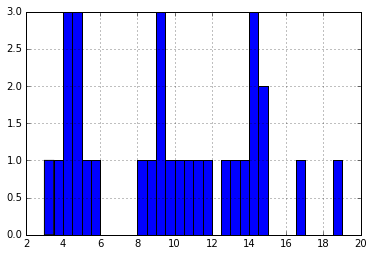

In [37]:
notes_seules = notes[ds_name]
notes_seules.hist(bins = (notes_seules.max() - notes_seules.min())*2)

In [154]:
notes_questions = notes[sous_exo]
notes_analysis = notes_questions.describe()

In [155]:
# J'aimerai récupérer le nom des questions qui ont été le moins répondus
notes_analysis[:1][notes_analysis[:1] == 25]

1.1.a  1.1.b  1.1.c  1.2.a  1.2.b  1.2.c  1.2.d  1.3.a  1.3.b  1.3.c  \
count     25     25     25     25    NaN    NaN    NaN     25     25    NaN   

       ...    2.2  2.3  3.1.a  3.1.b  3.1.c  3.1.d  3.2.a  3.2.b  3.2.c  3.2.d  
count  ...    NaN   25    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[1 rows x 22 columns]